In [132]:
import numpy as np
import sep
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]


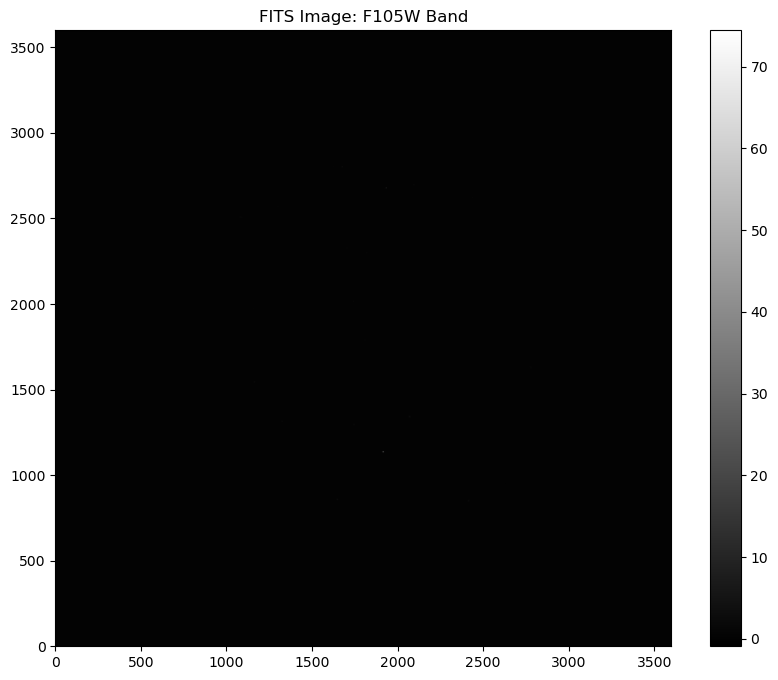

In [133]:
#opening the FITS file:
fits_file_f105w = fits.open("/Users/sanjanasasmal/Documents/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")


data_f105w = fits_file_f105w[0].data #Reading data

plt.imshow(data_f105w, cmap='gray', origin='lower')
plt.colorbar()
plt.title("FITS Image (F105W Band)")
plt.show()

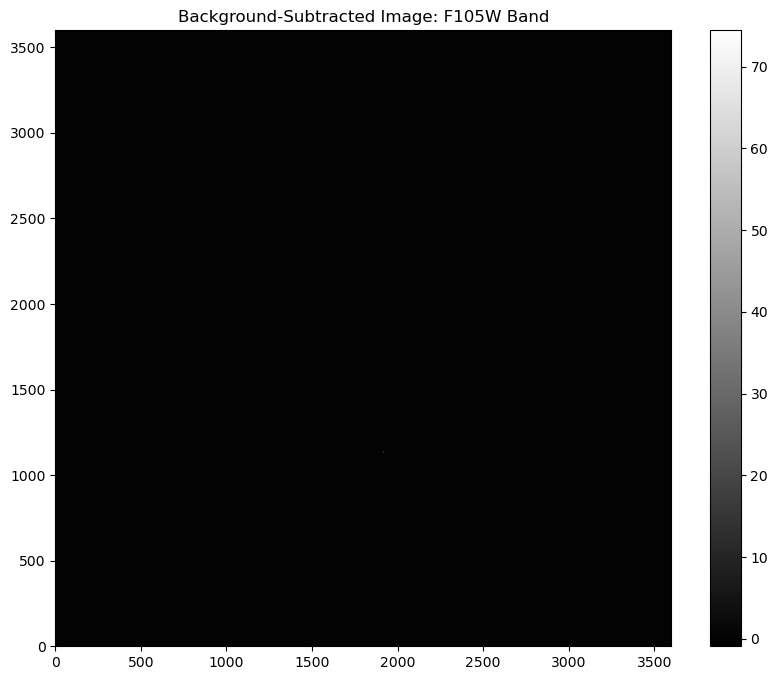

In [134]:

data_f105w = data_f105w.byteswap().newbyteorder()

#background..
bkg = sep.Background(data_f105w)

#Subtract the background
data_sub = data_f105w - bkg

#background subtracted image
plt.imshow(data_sub, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background-Subtracted Image (F105W Band)")
plt.show()


In [135]:

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms) #object detection on background subtracted data

#how many objects detected??
print(f"Number of detected objects: {len(objects)}")


Number of detected objects: 8640


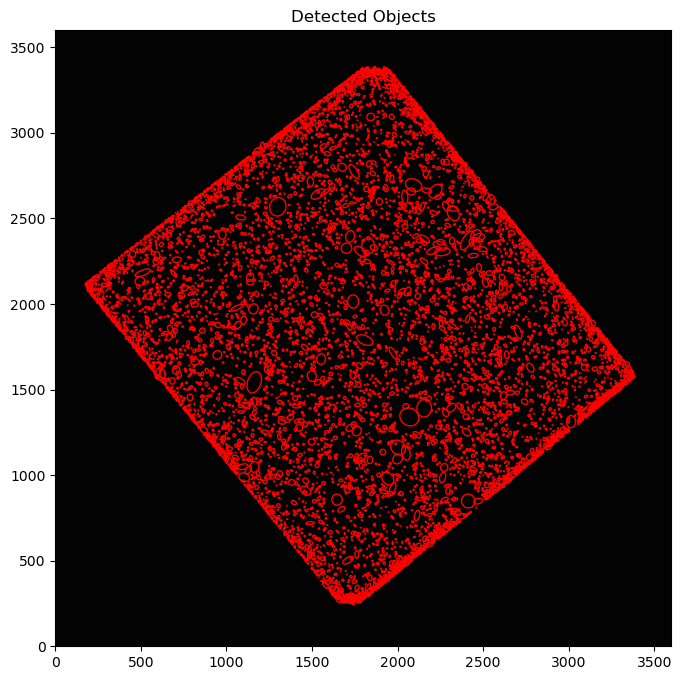

In [136]:
from matplotlib.patches import Ellipse

#background subtracted image plot
fig, ax = plt.subplots()
ax.imshow(data_sub, cmap='gray', origin='lower')

#plot ellipse for each detected object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],                        #semi-major axis
                height=6*objects['b'][i],                       #semi-minor axis
                angle=objects['theta'][i] * 180. / np.pi)       #rotation angle
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects")
plt.show()


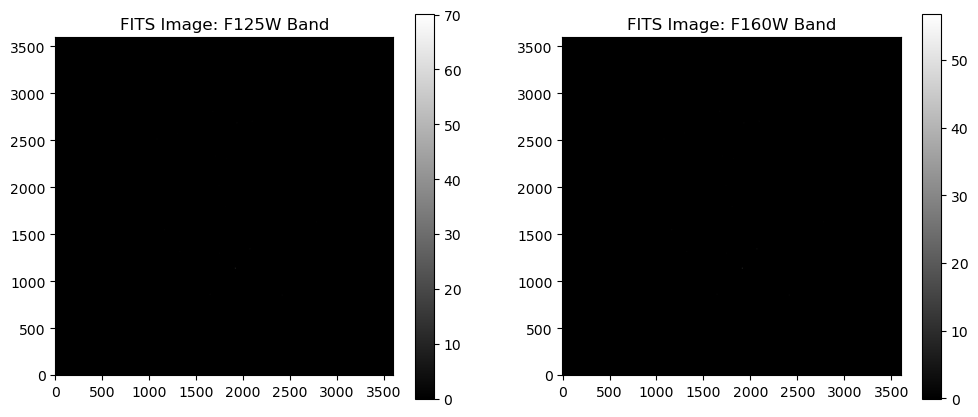

In [137]:
#open FITS files
fits_file_f125w = fits.open("/Users/sanjanasasmal/Documents/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
fits_file_f160w = fits.open("/Users/sanjanasasmal/Documents/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

data_f125w = fits_file_f125w[0].data.byteswap().newbyteorder()
data_f160w = fits_file_f160w[0].data.byteswap().newbyteorder()

#Display f125w and f160w images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(data_f125w, cmap='gray', origin='lower')
plt.title("FITS Image (F125W Band)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_f160w, cmap='gray', origin='lower')
plt.title("FITS Image (F160W Band)")
plt.colorbar()
plt.show()


In [138]:
def normalize_data(data):
    vmin, vmax = np.percentile(data, (1, 99))  #normalize based on 1st to 99th percentiles
    return np.clip((data - vmin) / (vmax - vmin), 0, 1)


data_f105w_norm = normalize_data(data_sub)
data_f125w_norm = normalize_data(data_f125w)
data_f160w_norm = normalize_data(data_f160w)

#print .
print(f"f105w normalized range: min={np.min(data_f105w_norm)}, max={np.max(data_f105w_norm)}")
print(f"f125w normalized range: min={np.min(data_f125w_norm)}, max={np.max(data_f125w_norm)}")
print(f"f160w normalized range: min={np.min(data_f160w_norm)}, max={np.max(data_f160w_norm)}")


f105w normalized range: min=0.0, max=1.0
f125w normalized range: min=0.0, max=1.0
f160w normalized range: min=0.0, max=1.0


RGB image range: min=0.0, max=1.0


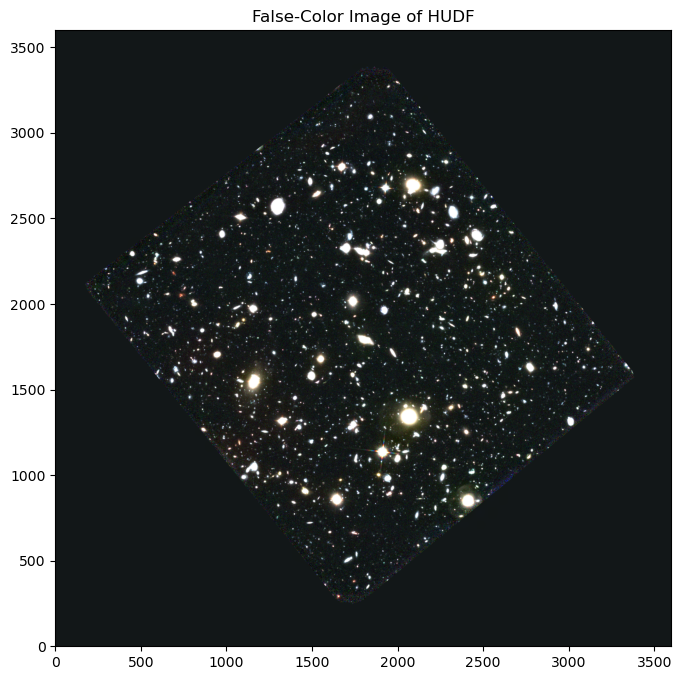

In [139]:
#stack normalized bands into RGB image
rgb_image = np.dstack((data_f160w_norm, data_f125w_norm, data_f105w_norm))

#RGB image range
print(f"RGB image range: min={np.min(rgb_image)}, max={np.max(rgb_image)}")

#false-color image
plt.imshow(rgb_image, origin='lower')
plt.title("False-Color Image of HUDF")
plt.show()


In [140]:
#SAVE false-color image
plt.imsave('false_color_image.png', rgb_image)
print("False-color image saved as 'false_color_image.png'")


False-color image saved as 'false_color_image.png'
